# Run this beast!

In [1]:

import os
import shutil
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import sys
sys.path.append(os.path.join("..", "..", "dependencies"))
import pyemu
import flopy
sys.path.append("..")
# import pre-prepared convenience functions
import herebedragons as hbd

In [2]:
# specify the temporary working folder
t_d = os.path.join('freyberg6_da_template')

if not os.path.exists(t_d):
    raise Exception("you need to run the 'freyberg_da_prep.ipynb' notebook")



In [3]:
pst = pyemu.Pst(os.path.join(t_d,"freyberg_mf6.pst"))

In [4]:
pst.pestpp_options['ies_parameter_ensemble'] = 'prior_pe.jcb'
pst.pestpp_options["ies_num_reals"] = 50
num_workers = 10
pst.control_data.noptmax = 3
pst.write(os.path.join(t_d, 'freyberg_mf6.pst'))
m_d = os.path.join('master_da')

noptmax:3, npar_adj:29653, nnz_obs:5


In [5]:
pyemu.os_utils.start_workers(t_d, # the folder which contains the "template" PEST dataset
                            'pestpp-da', #the PEST software version we want to run
                            'freyberg_mf6.pst', # the control file to use with PEST
                            num_workers=num_workers, #how many agents to deploy
                            worker_root='.', #where to deploy the agent directories; relative to where python is running
                            master_dir=m_d, #the manager directory
                            )

Like you probably have realized, all things get more complicated with sequential estimation, this includes post processing as well...

Let's load the global obs ensembles

In [6]:
files = [f for f in os.listdir(m_d) if ".0.obs.csv" in f]
pr_oes = {int(f.split(".")[1]):pd.read_csv(os.path.join(m_d,f),index_col=0) for f in files}
print(files)

['freyberg_mf6.0.0.obs.csv', 'freyberg_mf6.1.0.obs.csv', 'freyberg_mf6.10.0.obs.csv', 'freyberg_mf6.11.0.obs.csv', 'freyberg_mf6.12.0.obs.csv', 'freyberg_mf6.13.0.obs.csv', 'freyberg_mf6.14.0.obs.csv', 'freyberg_mf6.15.0.obs.csv', 'freyberg_mf6.16.0.obs.csv', 'freyberg_mf6.17.0.obs.csv', 'freyberg_mf6.18.0.obs.csv', 'freyberg_mf6.19.0.obs.csv', 'freyberg_mf6.2.0.obs.csv', 'freyberg_mf6.20.0.obs.csv', 'freyberg_mf6.21.0.obs.csv', 'freyberg_mf6.22.0.obs.csv', 'freyberg_mf6.23.0.obs.csv', 'freyberg_mf6.24.0.obs.csv', 'freyberg_mf6.3.0.obs.csv', 'freyberg_mf6.4.0.obs.csv', 'freyberg_mf6.5.0.obs.csv', 'freyberg_mf6.6.0.obs.csv', 'freyberg_mf6.7.0.obs.csv', 'freyberg_mf6.8.0.obs.csv', 'freyberg_mf6.9.0.obs.csv']


In [7]:
files = [f for f in os.listdir(m_d) if ".{0}.obs.csv".format(pst.control_data.noptmax) in f]
pt_oes = {int(f.split(".")[1]):pd.read_csv(os.path.join(m_d,f),index_col=0) for f in files}

In [8]:
otab = pd.read_csv(os.path.join(m_d,"obs_cycle_table.csv"),index_col=0)
wtab = pd.read_csv(os.path.join(m_d,"weight_cycle_table.csv"),index_col=0)

In [9]:
obs = pst.observation_data
obs = obs.loc[pst.nnz_obs_names,:]
obs

,obsnme,obsval,weight,obgnme,oname,otype,usecol,time,i,j,totim,observed,cycle,state_par_link
obsnme,,,,,,,,,,,,,,
oname:hdslay1_t1_otype:arr_i:26_j:6,oname:hdslay1_t1_otype:arr_i:26_j:6,34.251600,1.0,hdslay1_t1,hdslay1,arr,NaN,NaN,26,6,NaN,NaN,-1,pname:icstrtlayer1_inst:0_ptype:gr_pstyle:d_i:26_j:6_x:1625.00_y:3375.00_zone:1
oname:hdslay1_t1_otype:arr_i:3_j:8,oname:hdslay1_t1_otype:arr_i:3_j:8,34.736740,1.0,hdslay1_t1,hdslay1,arr,NaN,NaN,3,8,NaN,NaN,-1,pname:icstrtlayer1_inst:0_ptype:gr_pstyle:d_i:3_j:8_x:2125.00_y:9125.00_zone:1
oname:hdslay3_t1_otype:arr_i:26_j:6,oname:hdslay3_t1_otype:arr_i:26_j:6,34.245570,1.0,hdslay3_t1,hdslay3,arr,NaN,NaN,26,6,NaN,NaN,-1,pname:icstrtlayer3_inst:0_ptype:gr_pstyle:d_i:26_j:6_x:1625.00_y:3375.00_zone:1
oname:hdslay3_t1_otype:arr_i:3_j:8,oname:hdslay3_t1_otype:arr_i:3_j:8,34.730210,1.0,hdslay3_t1,hdslay3,arr,NaN,NaN,3,8,NaN,NaN,-1,pname:icstrtlayer3_inst:0_ptype:gr_pstyle:d_i:3_j:8_x:2125.00_y:9125.00_zone:1
oname:sfr_otype:lst_usecol:gage-1,oname:sfr_otype:lst_usecol:gage-1,3691.573065,1.0,obgnme,sfr,lst,gage-1,NaN,NaN,NaN,NaN,NaN,-1,NaN


In [10]:
ad_df = pd.read_csv(os.path.join(t_d,"alldata.csv"),index_col=0)
ad_df

,oname:hdslay1_t1_otype:arr_i:13_j:10,oname:hdslay1_t1_otype:arr_i:15_j:16,oname:hdslay1_t1_otype:arr_i:2_j:15,oname:hdslay1_t1_otype:arr_i:2_j:9,oname:hdslay1_t1_otype:arr_i:21_j:10,oname:hdslay1_t1_otype:arr_i:22_j:15,oname:hdslay1_t1_otype:arr_i:24_j:4,oname:hdslay1_t1_otype:arr_i:26_j:6,oname:hdslay1_t1_otype:arr_i:29_j:15,oname:hdslay1_t1_otype:arr_i:3_j:8,...,oname:hdslay3_t1_otype:arr_i:24_j:4,oname:hdslay3_t1_otype:arr_i:26_j:6,oname:hdslay3_t1_otype:arr_i:29_j:15,oname:hdslay3_t1_otype:arr_i:3_j:8,oname:hdslay3_t1_otype:arr_i:33_j:7,oname:hdslay3_t1_otype:arr_i:34_j:10,oname:hdslay3_t1_otype:arr_i:9_j:1,oname:sfr_otype:lst_usecol:gage-1,oname:sfr_otype:lst_usecol:headwater,oname:sfr_otype:lst_usecol:tailwater
cycle,,,,,,,,,,,,,,,,,,,,,
0,34.190167,34.038046,34.202978,34.558594,34.213346,33.999689,34.719783,34.644013,33.993860,34.571747,...,34.717087,34.565496,33.996285,34.579985,34.461322,34.197752,35.033637,1998.425564,-498.657479,-928.744788
1,34.178076,34.037024,34.201006,34.539065,34.208079,34.000762,34.699563,34.554179,33.996101,34.580241,...,34.697410,34.566638,33.998267,34.551542,34.459599,34.201044,34.999638,1914.074438,-480.627621,-945.713159
2,34.203032,34.067095,34.231292,34.542735,34.255435,34.041182,34.774182,34.639517,34.052414,34.559523,...,34.772820,34.636888,34.054619,34.534734,34.563183,34.293254,35.012982,2047.803833,-571.683292,-1106.916683
3,34.274843,34.133093,34.284466,34.587875,34.362326,34.115102,34.931566,34.797994,34.138846,34.614963,...,34.930103,34.795909,34.140918,34.676304,34.716963,34.419109,35.085834,2538.185281,-739.883524,-1347.110742
4,34.345650,34.191746,34.330344,34.654845,34.461362,34.176560,35.089206,34.923169,34.205158,34.651341,...,35.086986,34.928128,34.207755,34.667008,34.848538,34.519032,35.189924,2840.455384,-877.451526,-1538.393982
5,34.412400,34.236129,34.360848,34.723370,34.546029,34.223131,35.224844,35.080453,34.250541,34.761283,...,35.222193,35.036811,34.254503,34.763171,34.957656,34.602102,35.300896,3088.591379,-1000.540323,-1679.921087
6,34.442383,34.250920,34.366792,34.767757,34.582506,34.237063,35.309185,35.122988,34.264507,34.788279,...,35.305931,35.103545,34.269131,34.793168,35.016808,34.631032,35.378755,3244.631271,-1023.508893,-1725.451745
7,34.423859,34.222210,34.336185,34.775132,34.555534,34.206814,35.299420,35.111435,34.227300,34.820600,...,35.295507,35.121364,34.232676,34.817475,34.984534,34.594366,35.403683,2933.983091,-949.697752,-1628.449183
8,34.372714,34.168259,34.286994,34.748232,34.475454,34.145636,35.189195,34.983462,34.151048,34.789937,...,35.184365,35.013067,34.155867,34.766657,34.845319,34.475016,35.370553,2592.891596,-811.236047,-1394.757801


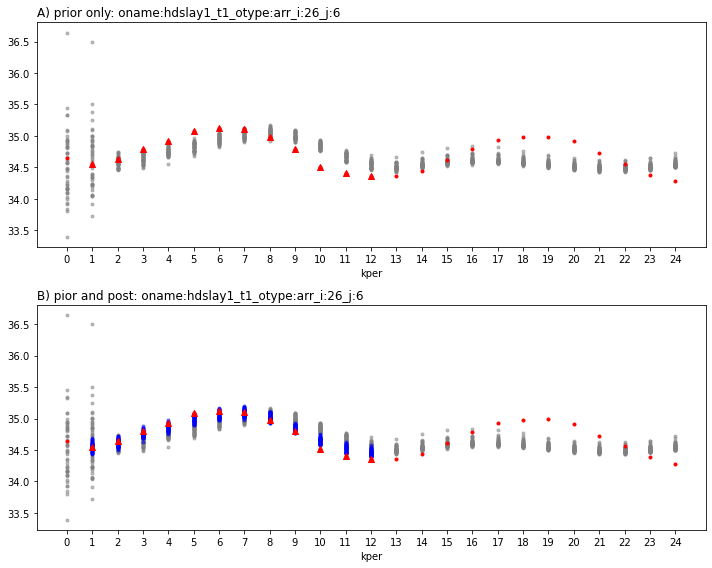

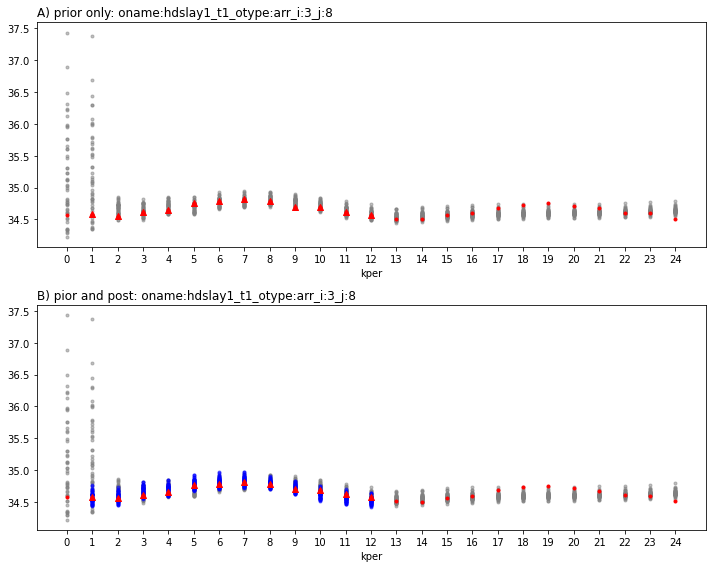

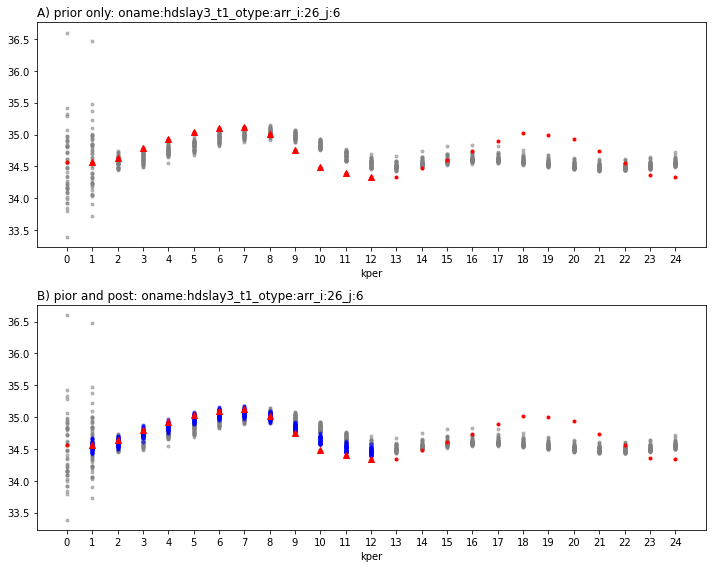

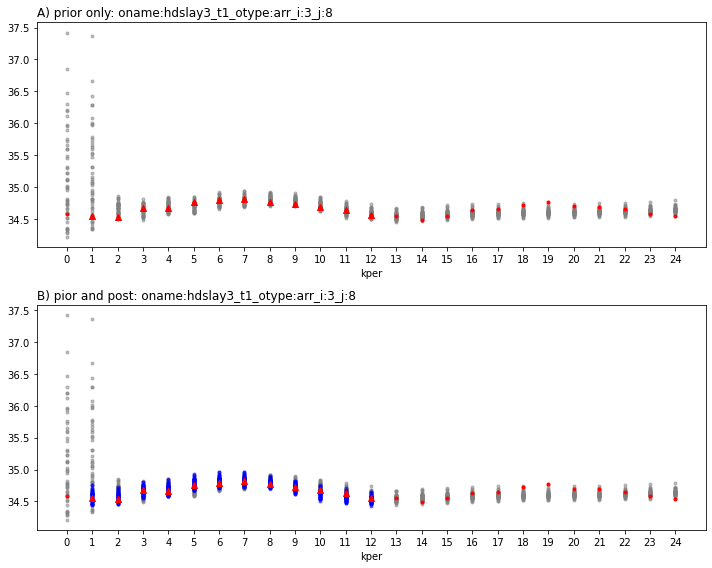

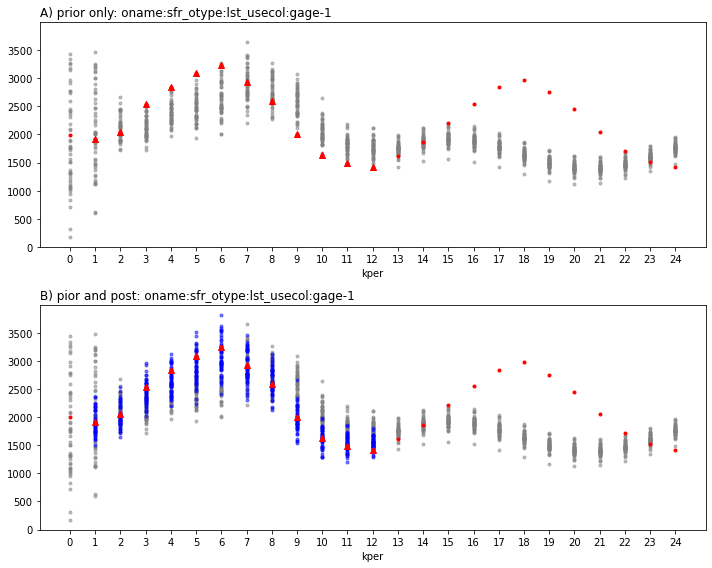

In [11]:
for o in pst.nnz_obs_names:
    fig,axes = plt.subplots(2,1,figsize=(10,8))
    
    for kper,oe in pr_oes.items():
        axes[0].scatter([kper]*oe.shape[0],oe.loc[:,o].values,marker=".",c="0.5",alpha=0.5)
        axes[1].scatter([kper]*oe.shape[0],oe.loc[:,o].values,marker=".",c="0.5",alpha=0.5)
    for kper,oe in pt_oes.items():
        axes[1].scatter([kper]*oe.shape[0],oe.loc[:,o].values,marker=".",c="b",alpha=0.5)
    
    ovals = otab.loc[o,:].values
    wvals = wtab.loc[o,:].values
    ylim = axes[1].get_ylim()
    xlim = axes[1].get_xlim()
    ovals[wvals==0] = np.nan
    axes[0].scatter(otab.columns.values,ovals,marker='^',c='r')
    axes[1].scatter(otab.columns.values,ovals,marker='^',c='r')
    axes[0].set_ylim(ylim)
    axes[0].set_xlim(xlim)
    axes[0].set_title("A) prior only: "+o,loc="left")
    axes[0].set_xlabel("kper")
    axes[1].set_ylim(ylim)
    axes[1].set_xlim(xlim)
    axes[1].set_title("B) pior and post: "+o,loc="left")
    axes[1].set_xlabel("kper")
    
    avals = ad_df.loc[:,o]
    axes[0].scatter(ad_df.index.values,avals,marker='.',c='r')
    axes[1].scatter(ad_df.index.values,avals,marker='.',c='r')
    
    plt.tight_layout()
    

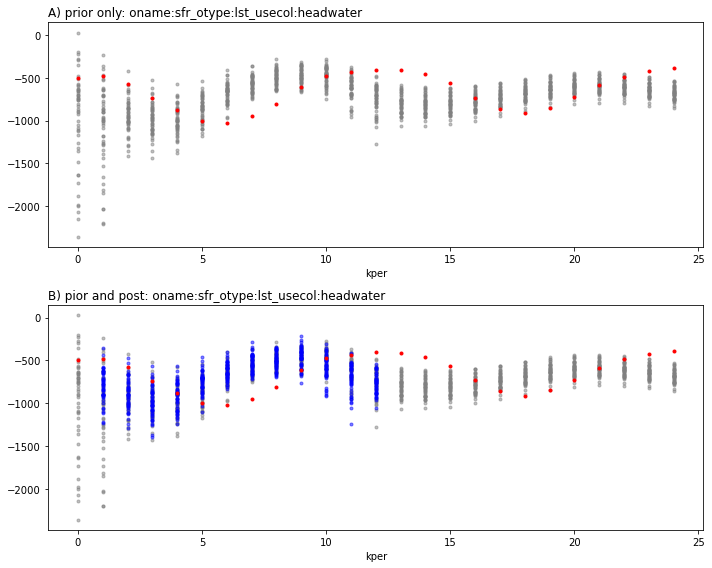

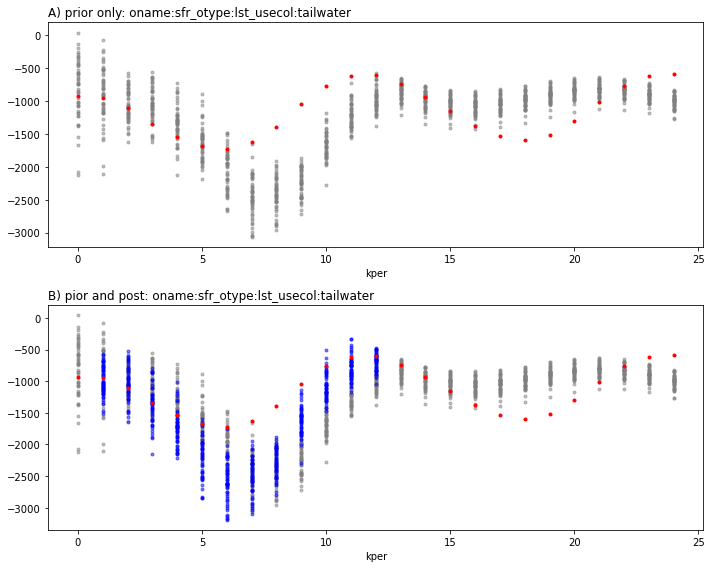

In [12]:
obs = pst.observation_data
forecasts = obs.loc[obs.obsnme.apply(lambda x: "headwater" in x or "tailwater" in x),"obsnme"]
forecasts
for o in forecasts:
    fig,axes = plt.subplots(2,1,figsize=(10,8))
    
    for kper,oe in pr_oes.items():
        axes[0].scatter([kper]*oe.shape[0],oe.loc[:,o].values,marker=".",c="0.5",alpha=0.5)
        axes[1].scatter([kper]*oe.shape[0],oe.loc[:,o].values,marker=".",c="0.5",alpha=0.5)
    for kper,oe in pt_oes.items():
        axes[1].scatter([kper]*oe.shape[0],oe.loc[:,o].values,marker=".",c="b",alpha=0.5)
    
    axes[0].set_title("A) prior only: "+o,loc="left")
    axes[0].set_xlabel("kper")
    axes[1].set_title("B) pior and post: "+o,loc="left")
    axes[1].set_xlabel("kper")
    
    avals = ad_df.loc[:,o]
    axes[0].scatter(ad_df.index.values,avals,marker='.',c='r')
    axes[1].scatter(ad_df.index.values,avals,marker='.',c='r')
    
    plt.tight_layout()

To help understand what is happening with PESTPP-DA (and to make sense of all the output files that PESTPP-DA generates), let's inspect the master dir: